In [16]:
import nltk
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.metrics.pairwise import cosine_similarity

In [17]:
text = open("/Users/vaisakh/programs/Notebooks/dataset/news.txt", "r").read().replace("\n\n", " ").replace("\n", " ")
# text = open("news2.txt", "r").read().replace("\n\n", " ").replace("\n", " ")

In [18]:
def tokenize(text):
    tokenized_sentences = sent_tokenize(text)
    tokenized_words = []
    for sentence in tokenized_sentences:
        tokenized_words_sub = []
        for words in word_tokenize(sentence):
            tokenized_words_sub.append(words)
        tokenized_words.append(tokenized_words_sub)
    return (tokenized_words, tokenized_sentences)

def removeStopwords(text):
    tokenized_words = []
    eng = set(stopwords.words("english"))
    for sentence in text:
        tokenized_words_sub = []
        for word in sentence:
            if word not in eng:
                tokenized_words_sub.append(word)
        tokenized_words.append(tokenized_words_sub)
    return tokenized_words

def removePunch(text):
    tokenized_words = []
    punch = set("""~!@#$%^&*()_+`-=}{|[]\;'":<>?,./""")
    for sentence in text:
        tokenized_words_sub = []
        for word in sentence:
            str_word = ""
            for chr in word:
                if chr not in punch:
                    str_word+=chr.lower()
            if len(str_word) > 1:
                tokenized_words_sub.append(str_word)
        tokenized_words.append(tokenized_words_sub)
    return tokenized_words


In [19]:
tokenized_words, tokenized_sentences = tokenize(text)
tokenized_words = removeStopwords(tokenized_words)
tokenized_words = removePunch(tokenized_words)

In [20]:
vec = Word2Vec(tokenized_words, window=1, min_count=1, vector_size=100, epochs=100, sg=1)
print(vec.wv.index_to_key)

['team', 'replaced', 'haas', 'schumacher', 'steiner', 'experienced', 'two', '2021', 'mazepin', 'hulkenberg', 'drivers', 'lineup', 'allrookie', 'fielding', 'f1', 'guenther', 'the', 'regret', 'while', 'mick', 'boss', 'nikita', 'form', 'rookies', '2020', 'both', 'american', 'grosjean', 'romain', 'magnussen', 'kevin', 'year', 'last', 'single', 'said', 'he', 'looking', 'right', 'finds', 'compared', 'time', 'different', 'situation', 'revealed', 'go', 'way', 'realized', 'claiming', 'regretted', 'questioned', 'back', 'performance', 'years', 'consistent', 'together', 'put', 'grow', 'help', 'needed', 'hand', 'felt', 'reasons', 'one', 'nico', 'veteran', 'season', '2023', 'stayed']


<h3>Sentence vector</h3>

In [21]:
sentence_vector = []
for sentence in tokenized_words:
    sum = 0
    for word in sentence:
        sum+=vec.wv[word]
    sentence_vector.append(sum/len(sentence))
len(sentence_vector)

8

<h3>Cosin similarity</h3>

In [22]:
cosineSimilarityVecotr = {}
for i in range(len(sentence_vector)):
    for j in range(len(sentence_vector)):
        if i in cosineSimilarityVecotr:
            cosineSimilarityVecotr[i]+=cosine_similarity([sentence_vector[i]], [sentence_vector[j]])[0][0]
        else:
            cosineSimilarityVecotr[i]=cosine_similarity([sentence_vector[i]], [sentence_vector[j]])[0][0]
    cosineSimilarityVecotr[i]/=len(sentence_vector[i])
cosineSimilarityVecotr = [ [idx, sim] for idx, sim in  cosineSimilarityVecotr.items()]

In [23]:
limit = 5
def comparator(x): return x[1]
cosineSimilarityVecotr.sort(key=comparator)
cosineSimilarityVecotr = cosineSimilarityVecotr[:5]
cosineSimilarityVecotr.sort()
for idx, sim in cosineSimilarityVecotr:
    print(tokenized_sentences[idx])

Haas F1 boss Guenther Steiner does not regret fielding an all-rookie lineup in 2021.
The American team last had two experienced drivers in Kevin Magnussen and Romain Grosjean in 2020.
Both were replaced by two rookies in the form of Nikita Mazepin and Mick Schumacher.
Looking back, Guenther Steiner was questioned if Haas regretted fielding an all-rookie lineup in 2021.
He said:


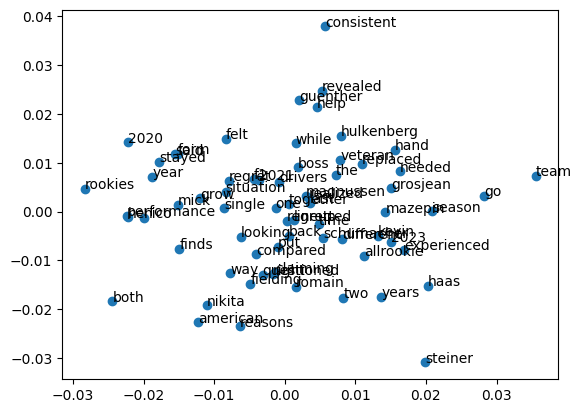

In [24]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

vocab = vec.wv.index_to_key
x = vec.wv[vocab]

pca = PCA(n_components=2)
res = pca.fit_transform(x)
plt.scatter(res[:, 0], res[:, 1])

for i in range(len(vocab)):
    plt.annotate(vocab[i], xy=(res[i, 0], res[i, 1]))
